In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable as sdt

In [38]:
pd.options.display.max_columns = None

In [39]:
df = pd.read_csv("../data/02-tiburon_4.csv", index_col = 0)
df.head(2)

year        type country  activity   age species month fatal gender
0  2018     Boating     usa  Paddling  57.0   White   Jun     N      F
1  2018  Unprovoked  brazil  Swimming  18.0   Tiger   Jun     Y      M

# Pair Programming EDA III

Es el momento de hacer una buena exploraci√≥n visual de los datos para entender un poquito mejor el dataset. Para ello trabajaremos con la librer√≠a matplotlib y seaborn.

# Hip√≥tesis

Antes de seguir, recordamos las preguntas que nos planteamos al principio del pair programming de EDA para dirigir nuestro an√°lisis.

- ¬øEs Australia es el sitio m√°s peligroso y letal para estar relajada en la playa?
- ¬øHay diferencias entre los paises en los ataques a hombres y mujeres?
- ¬øCu√°les son las edades que m√°s sufren ataques?
- Independientemente de la edad, sufren los hombres m√°s ataques que las mujeres?
- ¬øEn qu√© mes ocurren m√°s ataques?
- ¬øCu√°l es la relaci√≥n entre la especie y el tipo de ataque (si es fatal o no)?
- ¬øC√≥mo han evolucionado los ataques a lo largo del tiempo?

De todo esto, nos damos cuenta que solo tenemos que limpiar algunas de las columnas, en concreto age, species, country, fatal, year, sex. Reducimos esto a una tabla para saber qu√© tenemos ya limpito y qu√© no. Actualizamos esta tabla ya que en el ejercicio de pair de Limpieza I y II ya dejamos algunas columnas limpitas:

# Objetivos

En el ejercicio de hoy tendremos que contestar a las siguientes preguntas:

üìå Nota Como siempre, despu√©s de cada gr√°fica incluid una peque√±a explicaci√≥n de lo que nos est√° mostrando la gr√°fica.

1. Estableced el tama√±o de las figuras al inicio de vuestro jupyter para que todas tengan las mismas dimensiones.

In [40]:
plt.rcParams["figure.figsize"] = (10,8) #para el tama√±o

import warnings
warnings.filterwarnings('ignore') # para los errores

2. Manos a la obra con los plots, estos ir√°n muy dirigidos hacia las preguntas que queremos contestar, para hacer una primera aproximaci√≥n a nuestras hip√≥tesis:

- ¬øCu√°ntos ataques hubo por pais? ¬øSe puede ver algo claro si ploteamos todos los paises? En caso de que no, seleccionad solo los 10 paises con m√°s ataques y volved a hacer el plot.

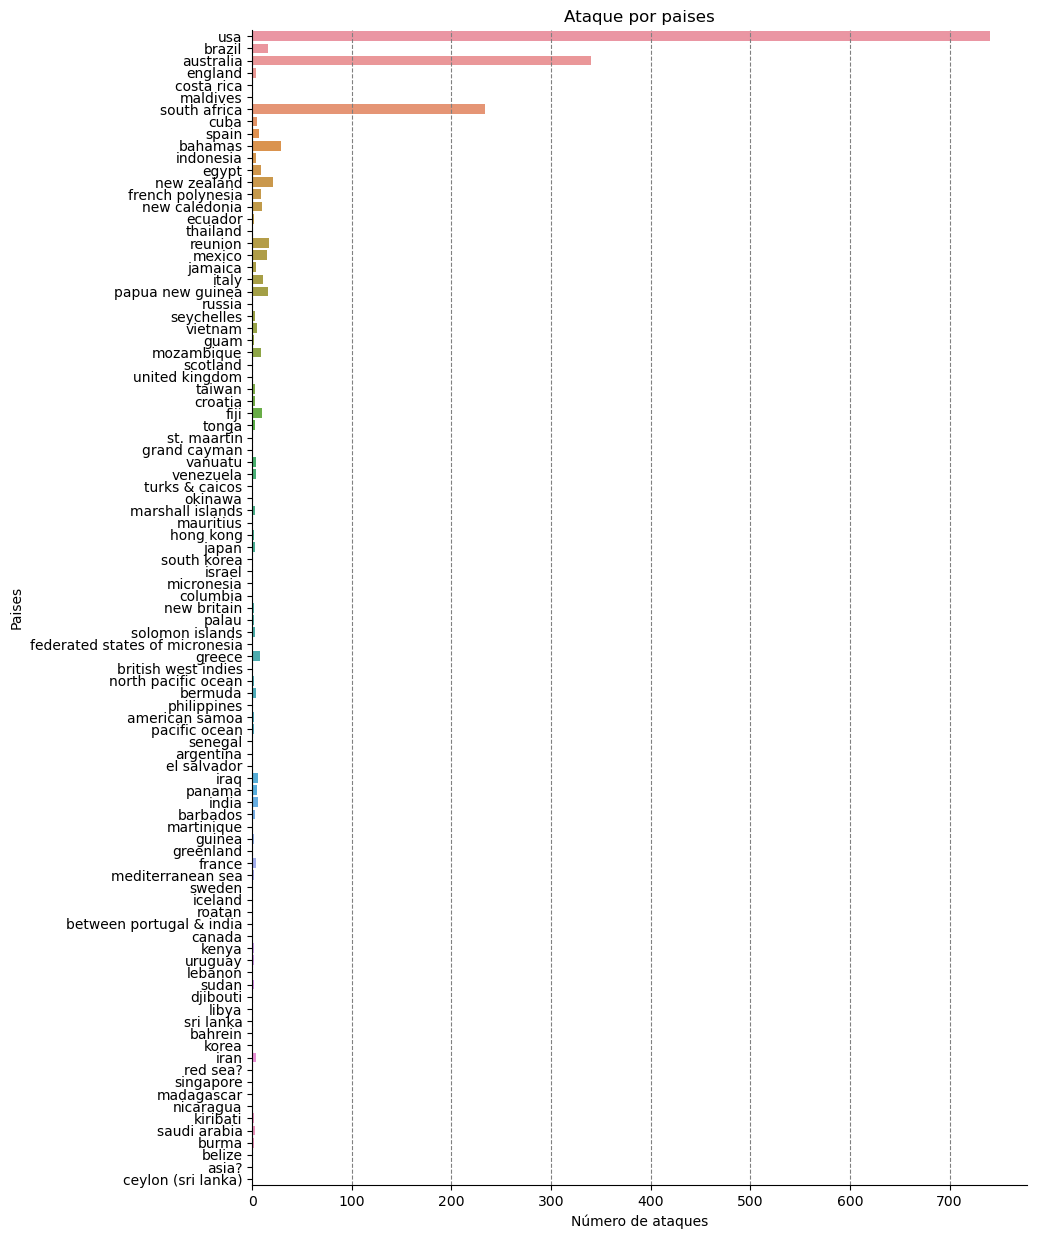

In [41]:
plt.figure(figsize = (10,15))
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
sns.countplot(y = df["country"], data = df)
plt.grid(axis = 'x', color = 'gray', linestyle = 'dashed')
plt.title( 'Ataque por paises')
plt.xlabel('N√∫mero de ataques')
plt.ylabel('Paises')
plt.show()

**Conclusi√≥n**:La gr√°fica obtenida es ilegible, necesitamos o reducir paises o aumentar el tama√±o de la grafica, pero nos pedian que todas tuvieran el mismo tama√±o.

- ¬øCu√°ntos ataques hubo por pais? ¬øSe puede ver algo claro si ploteamos todos los paises? En caso de que **no**, seleccionad solo los **10 paises** con m√°s ataques y volved a hacer el plot.
 

In [42]:
# creamos una lista con los 10 paises pedidos, con mayor n√∫mero de ataques.( colocamos el index para que nos salgan los nombres de los paises no los valores)
lista_paises = list(df.country.value_counts()[0:10].index)

In [43]:
#creamos un nuevo DF que contiene solo los paises de la lista
df_p_10 = df.loc[df['country'].isin(lista_paises)]

In [44]:
df_p_10.country.value_counts() # comprobamos

usa                 741
australia           340
south africa        234
bahamas              29
new zealand          21
reunion              17
brazil               16
papua new guinea     16
mexico               15
italy                11
Name: country, dtype: int64

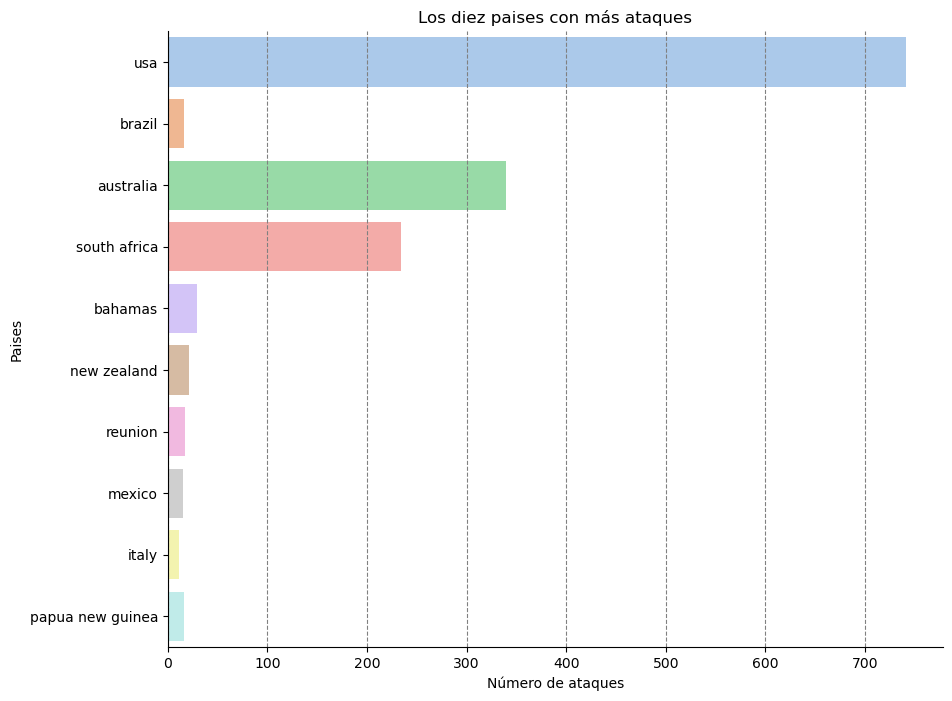

In [45]:
plt.figure()
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 
sns.countplot(y = "country", data = df_p_10, palette = 'pastel')
plt.grid(axis = 'x', color = 'gray', linestyle = 'dashed')
plt.title( 'Los diez paises con m√°s ataques')
plt.xlabel('N√∫mero de ataques')
plt.ylabel('Paises')
plt.show()

**Conclusion** : El pais con m√°s ataques es Usa seguido por australia y sudafrica, el resto tienen un numero de ataques no rese√±able.

- Usando el DataFrame de los 10 paises con m√°s ataques, ¬øhay diferencias entre sexos en esos paises?

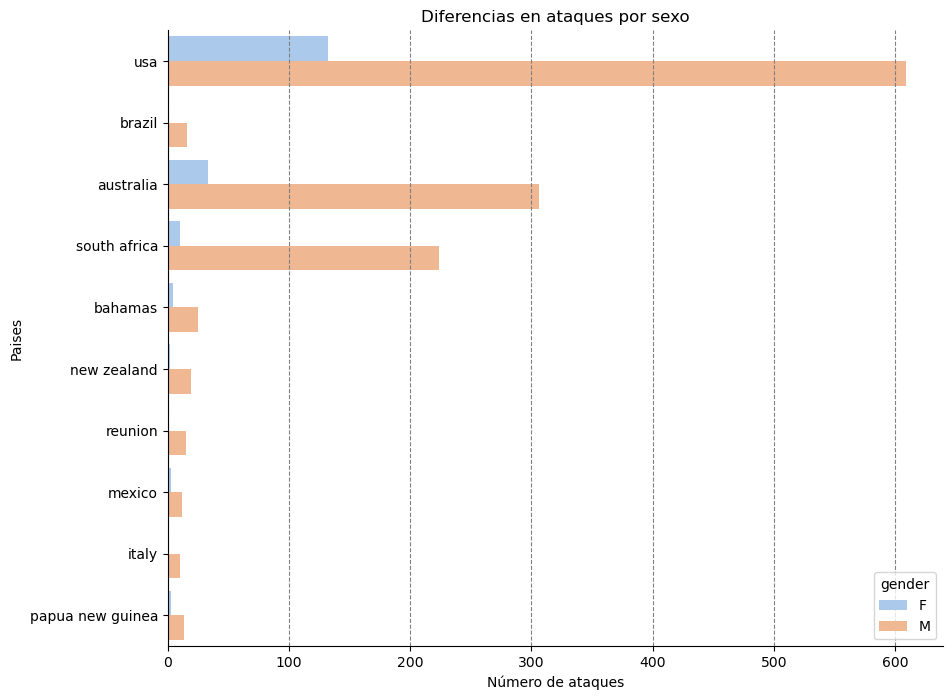

In [46]:
plt.figure()
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
sns.countplot(y = "country", data = df_p_10, palette = 'pastel', hue = 'gender')
plt.grid(axis = 'x', color = 'gray', linestyle = 'dashed')
plt.title( 'Diferencias en ataques por sexo')
plt.xlabel('N√∫mero de ataques')
plt.ylabel('Paises')
plt.show()

**Conclusi√≥n**: Los hombres sufren much√≠simos m√°s ataques de tiburones. 

- ¬øQu√© edad recibe mayor n√∫mero de ataques?
 
            üí° Pista üí° Para que esta gr√°fica nos salga legible tendremos que crear antes grupos de edad. 

            Para hacer esto de una forma sencilla tenemos el m√©todo pd.cut() que aprendimos en la lecci√≥n de Limpieza II.
 

In [47]:
df.head(1)

year     type country  activity   age species month fatal gender
0  2018  Boating     usa  Paddling  57.0   White   Jun     N      F

In [48]:
df['rango_edad'] = pd.cut(df['age'], 5, labels = ['muy joven','joven','adulto', 'mayor','anciano'])
df.head(1)

year     type country  activity   age species month fatal gender rango_edad
0  2018  Boating     usa  Paddling  57.0   White   Jun     N      F      mayor

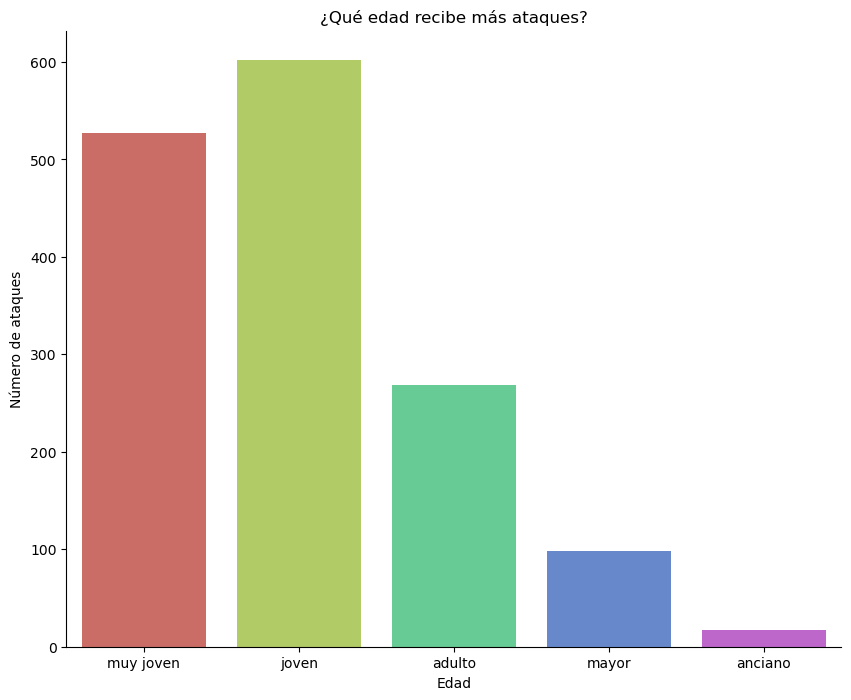

In [49]:
plt.figure()
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
sns.countplot(x = "rango_edad",palette = 'hls', data = df)
plt.title( '¬øQu√© edad recibe m√°s ataques?')
plt.xlabel('Edad')
plt.ylabel('N√∫mero de ataques')
plt.show()

**Conclusi√≥n**: Se aprecia que entre los rangos de edad, los de edades m√°s jovenes tienen m√°s ataques, mientras que a partir de cierta edad estos se reducen. Tiene sentido ya que las actividades donde suelen ocurrir los ataques son m√°s comunes entre gente joven

- Ataques entre sexos, ¬øhay diferencia?

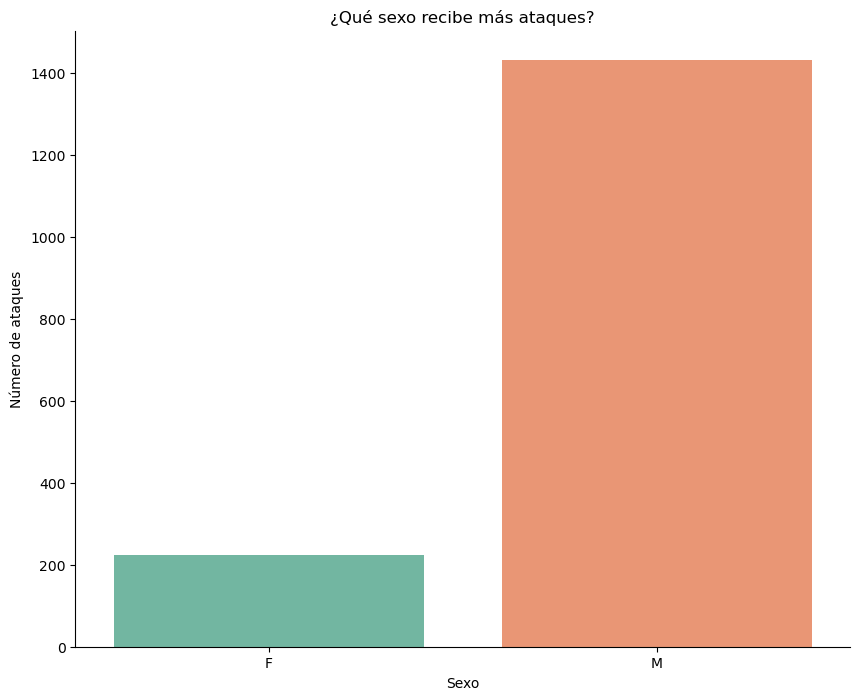

In [50]:
plt.figure()
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
sns.countplot(x = "gender", palette = 'Set2',data = df)
plt.title( '¬øQu√© sexo recibe m√°s ataques?')
plt.xlabel('Sexo')
plt.ylabel('N√∫mero de ataques')
plt.show()

**Conclusi√≥n**: como llevamos viendo en todas las gr√°ficas obtenidas los hombres reciben m√°s ataques, confirma nuestras conclusiones.

- ¬øCuando ocurren m√°s ataques? ¬øOs sale algo raro en la gr√°fica? Intentad limpiar un poco los datos para que os salga mejor.

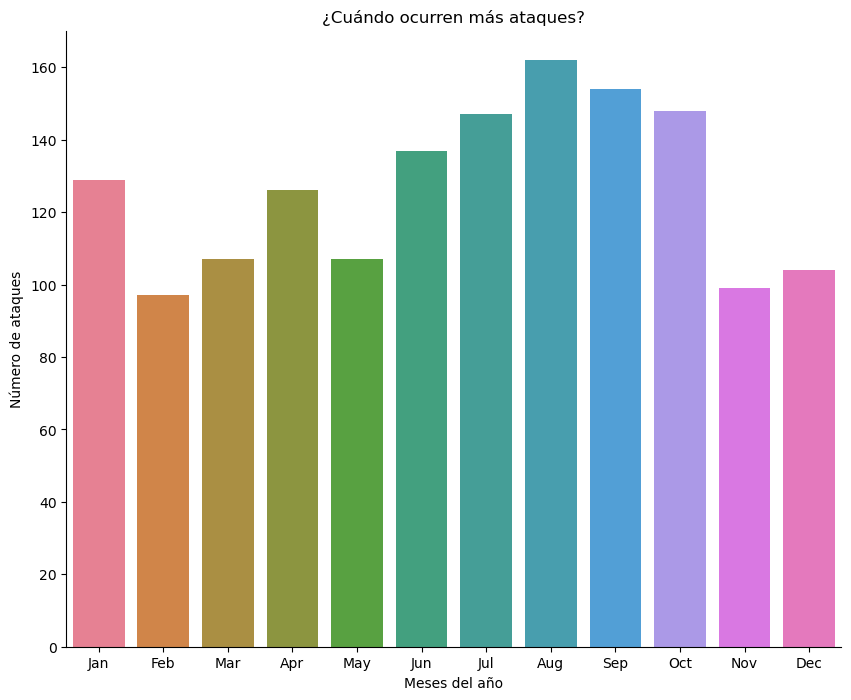

In [51]:
plt.figure()
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
sns.countplot(x = "month", palette = 'husl', data = df, order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title( '¬øCu√°ndo ocurren m√°s ataques?')
plt.xlabel('Meses del a√±o')
plt.ylabel('N√∫mero de ataques')
plt.show()

**Conclusi√≥n**: Hemos ordenado la gr√°fica por el calendario, para poder apreciar mejor la √©poca del a√±o en el que ocurren m√°s ataques. Comos ver que entre junio y octubre es cuando ocurre el mayor n√∫mero, aunque tambi√©n resalta enero, seguramente por los ataques en Australia y Sud√°frica, donde hace buena temperatura en esa √©poca del a√±o.

Hacemos un swarmplot para ver mejor las diferencias de los ataques por sexo y edad.

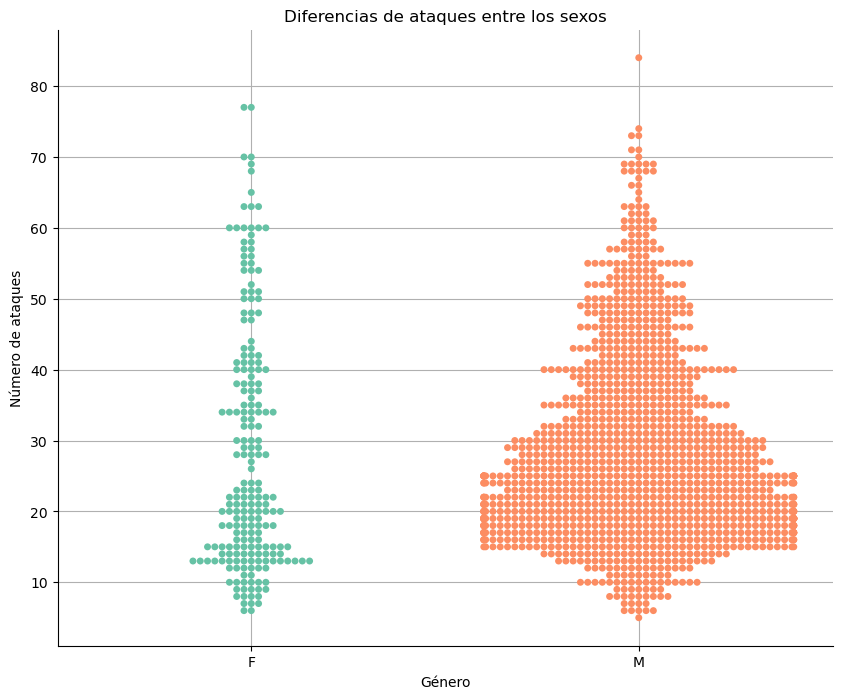

In [55]:
plt.figure()
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
sns.swarmplot('gender', 'age',palette= 'Set2', data=df)
plt.title( 'Diferencias de ataques entre los sexos')
plt.xlabel('G√©nero')
plt.ylabel('N√∫mero de ataques')
plt.grid ()
plt.show();

**Conclusi√≥n** : podemos ver que hay muchos mas ataques a hombres entre las edades de 15 a 30. 